# Udacity Data Analyst Project 4: Data Wrangling

In this project, data of WeRateDogs Twitter archive will be gathered from three sources. Data will be assessed then cleaned. All data will be combined into a table or into multiple tables to keep data tidy and clean. 

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

## Part 1. twitter-archive-enhanced.csv

### Gathering 

In [2]:
# Import uploaded twitter-archive-enhanced.csv file. 
# twitter-archive-enhanced.csv is given in the project.
# The file was uploaded to the folder manually as intructed 

df_enhanced = pd.read_csv('Data/twitter-archive-enhanced.csv')

### Visual and Programmatic Assessing 

**Quality**
- Data include retweets. Project states that only original ratings should be used
- Some rows have missing colums so individual data seems to be shifted
- Data in `source` column includes unnecessary HTML codes 
- Sometimes "a" or "an" were taken as names in `name` column
- Sometimes other random words (e.g. "mad" or "this") are taken as names in `name` column
- Some data in `expanded_urls` are missing 
- Some data in `expanded_urls` are not twitter URLs (incorrect URL's) 
- Some data in `expanded_urls` is repeated twice within itself
- The data type of `in_reply_to_status_id `, `in_reply_to_user_id `, `retweeted_status_id `, and `retweeted_status_user_id` are `float64` and `tweet_id` is `int64`. 

**Tidiness**
- Stages (`doggo`, `floofer`, `pupper` & `puppo`) of dogs are separated into four columns 
- In Text column, Text of the tweet and image URL are combined together

In [3]:
df_enhanced.info()
# There are 2,356 observations - some may not be valid 
# There are 17 variables - some may not be tidy 
# Some expanded_urls are missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
df_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
837,767754930266464257,NaN,NaN,2016-08-22 16:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828011680...,11,10,Brutus,None,None,None,None


### Cleaning

In [6]:
# Copy data 
df_enhanced_clean = df_enhanced.copy()

**Define (1)**
- Remove retweets 

**Clean**


In [7]:
# Drop all RT's 
df_enhanced_clean = df_enhanced_clean.loc[df_enhanced_clean['text'].str.contains("RT @") == False]

# Reset index number 
df_enhanced_clean = df_enhanced_clean.reset_index(drop=True)

**Define (2)**
- Make sure all data of obervation matches to the columns 

**Clean**


In [ ]:
# When all retweets are remove, shifted data were clearned as well
# No further action is needed 

**Define (3)**
- Remove unnecessary HTML codes from `source` column

**Clean**


In [8]:
df_enhanced_clean.source.nunique()
# There are four unique values for source 

4

In [9]:
# Find the unique values for source
u_val, inds = np.unique(df_enhanced_clean.source, return_index=True) 

for ind in inds:
    src = df_enhanced_clean.iloc[ind]['source'] # Find the exact string 
    # Get slices (text position)
    slicefront = df_enhanced_clean.iloc[ind]['source'].find(">")
    sliceend = df_enhanced_clean.iloc[ind]['source'].find("</a>")
    # Remove HTML codes and just leave the source 
    df_enhanced_clean.loc[df_enhanced_clean['source'] == src, 'source'] = df_enhanced_clean.loc[df_enhanced_clean['source'] == src,'source'].str[slicefront+1:sliceend]

**Define (4)**
- Replace incorrect names (e.g. "a", "an" etc) to "None"  

**Clean**


In [10]:
# From assessing, names start with lower case letter are incorrect names

# Find all rows that names are start with lower case letter and replace with "None"
df_enhanced_clean.loc[df_enhanced_clean['name'].str[0].str.islower(), 'name'] = "None"

**Define (5)**
- Change the data type of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `tweet_id` to `str`. 
- Change all null values to "N/A"

**Clean**


In [11]:
# nulls to "N/A"
df_enhanced_clean.loc[df_enhanced_clean['in_reply_to_status_id'].isnull(),'in_reply_to_status_id'] = "N/A"
df_enhanced_clean.loc[df_enhanced_clean['in_reply_to_user_id'].isnull(),'in_reply_to_user_id'] = "N/A" 
df_enhanced_clean.loc[df_enhanced_clean['retweeted_status_id'].isnull(),'retweeted_status_id'] = "N/A" 
df_enhanced_clean.loc[df_enhanced_clean['retweeted_status_user_id'].isnull(),'retweeted_status_user_id'] = "N/A" 
# tweet_id has no missing value

In [12]:
# Convert to str 
df_enhanced_clean['in_reply_to_status_id'] = df_enhanced_clean['in_reply_to_status_id'].astype(str)
df_enhanced_clean['in_reply_to_user_id'] = df_enhanced_clean['in_reply_to_user_id'].astype(str)
df_enhanced_clean['retweeted_status_id'] = df_enhanced_clean['retweeted_status_id'].astype(str)
df_enhanced_clean['retweeted_status_user_id'] = df_enhanced_clean['retweeted_status_user_id'].astype(str)
df_enhanced_clean['tweet_id'] = df_enhanced_clean['tweet_id'].astype(str)

**Define (6)**
- Remove non-twitter URLs from `expanded_urls` column and replace with a correct one
- Fill in missing `expanded_urls` column data

Correct format of `expanded_urls`:
- "https://twitter.com/dog_rates/status/" + TweetID + "photo/1"

**Clean**


In [13]:
# Verify all extended urls 
df_enhanced_clean['expanded_urls'] = "https://twitter.com/dog_rates/status/" + df_enhanced_clean['tweet_id'] + "photo/1"

**Define (7)**
- Combine `doggo`, `floofer`, `pupper` & `puppo` columns into `Stage`

**Clean**


In [15]:
df_stage2 = df_enhanced_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]
df_stage2.head(5)

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None


In [16]:
df_stage2.loc[(df_stage2 ['doggo'] == 'None') & (df_stage2 ['floofer'] == 'None') & (df_stage2 ['pupper'] == 'None') & (df_stage2 ['puppo'] == 'None') == False, 'all-none'] = "N/A"
df_stage2.loc[(df_stage2 ['doggo'] == 'None') & (df_stage2 ['floofer'] == 'None') & (df_stage2 ['pupper'] == 'None') & (df_stage2 ['puppo'] == 'None') == False, 'all-none'] = "None"

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [17]:
df_stage2 = pd.melt(df_stage2, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo','all-none'],
                   var_name='stage_name', value_name='stage')

In [18]:
# Drop all "None"s 
df_stage2 = df_stage2.loc[df_stage2['stage'] != "None"]

# Reset index number 
df_stage2 = df_stage2.reset_index(drop=True)

In [19]:
df_stage2 = df_stage2.drop(['stage_name'], axis=1)

In [20]:
df_stage2.info()
# There are duplicates. Total observation should be 2175. 
# Total duplicates are 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 2 columns):
tweet_id    2187 non-null object
stage       356 non-null object
dtypes: object(2)
memory usage: 34.2+ KB


In [21]:
dupfirst = df_stage2[df_stage2.duplicated('tweet_id', keep='first')]
duplast = df_stage2[df_stage2.duplicated('tweet_id', keep='last')]
dupfirst.shape == duplast.shape
# If ture, there is only one duplicate per observation

True

In [22]:
# Combine duplicated stages 
for tweetid in dupfirst['tweet_id'] :
    newstage = duplast[duplast['tweet_id']==tweetid]['stage'].values[0] + ', ' + dupfirst[dupfirst['tweet_id']==tweetid]['stage'].values[0]
    df_stage2['stage'][np.where(df_stage2["tweet_id"] == tweetid)[0][0]] = newstage

In [23]:
# Drop duplicate tweet_id 
df_stage2.drop_duplicates('tweet_id', keep='first', inplace=True)

In [24]:
# Merge df_stage2 to df_enhance_clean 
df_enhanced_clean = df_enhanced_clean.join(df_stage2.set_index('tweet_id'), on='tweet_id')

In [25]:
# Fill nulls to "Nones" for stage column 
df_enhanced_clean['stage'] = df_enhanced_clean['stage'].fillna("None")

# Drop untidy stage columns
df_enhanced_clean = df_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


**Define (8)**
- Separate data in `text` column into `text` and `image_url`

**Clean**

In [26]:
textsplit = df_enhanced_clean["text"].str.split("http", n = 1, expand = True) 
df_enhanced_clean["tweet_text"]= textsplit[0] 
df_enhanced_clean["tweet_image_url"]= textsplit[1] 
df_enhanced_clean["tweet_image_url"]= df_enhanced_clean["tweet_image_url"].str.replace('s://','https://')

# Fix obervations with multiple image URLs
df_enhanced_clean["tweet_image_url"]= df_enhanced_clean["tweet_image_url"].str.replace(' httphttp',', http')

In [27]:
# Drop untidy column
df_enhanced_clean = df_enhanced_clean.drop(['text'], axis=1)

# Fill missing value in image url's 

df_enhanced_clean['tweet_image_url'] = df_enhanced_clean['tweet_image_url'].fillna("No image URL")

## Part 2. image_predictions.tsv

### Gathering

In [ ]:
# Download the image prediction file (image_predictions.tsv) programically 
#     to the "Data" folder

# Make directory if it doesn't already exist
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Image prediction url is given in the project 
image_prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(image_prediction_url)

with open(os.path.join(folder_name,
                           image_prediction_url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [28]:
# Open the file in the notebook 
df_image = pd.read_csv('Data/image-predictions.tsv', delimiter='\t', encoding='utf-8')

### Visual and Programmatic Assessing

In [29]:
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Quality**
- Dog breed names (`p1`, `p2`, and `p3` columns) are mixed with lower and upper case letters
- Dog breed names (`p1`, `p2`, and `p3` columns) use underscore instead of space 
- `p1`, `p2`, and `p3` column names aren't clear
- The data type of `tweet_id` is `int64`

In [30]:
df_image.info()
# No mising data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_image.describe()
# All p_conf values must be between 0 and 1 --> Fit the criteria 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True


### Cleaning

This Data is overally tidy itself.
Each observation is on each row. Each variable is in each column. Also, observational unit (i.e. Image prediction from given dog images) forms a table. Therefore, only quality issue will be addressed for this table. 

**Define (1)**
- ID needs to be string. Change `tweet_id` to `str`

In [33]:
# Copy data 
df_image_clean = df_image.copy()

In [34]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

**Define (2)**
- Replace underscore to space in `p1`, `p2`, and `p3` columns
- Make all letters lower case except for the first letter in `p1`, `p2`, and `p3` columns
- Rename `p1`, `p2`, and `p3` columns to `prediction1`, `prediction2`, `predictino3`

In [35]:
df_image_clean['p1'] = df_image_clean['p1'].str.replace('_', ' ').str.capitalize()
df_image_clean['p2'] = df_image_clean['p2'].str.replace('_', ' ').str.capitalize()
df_image_clean['p3'] = df_image_clean['p3'].str.replace('_', ' ').str.capitalize()

In [36]:
df_image_clean.rename(columns={'p1':'prediction1',
                          'p2':'prediction2',
                          'p3':'prediction3'}, inplace=True)

In [37]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,prediction1,p1_conf,p1_dog,prediction2,p2_conf,p2_dog,prediction3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Part 3. Query Twitter Data

### Gathering

In [38]:
# Download twitter data using tweet ID 

auth = tweepy.OAuthHandler('nGw2t9SzYTrhlDXrcbwak2Lbp', '59Skd400ChIqR9WITrlgM9J3XeXE1iBA8YlceSSIqzlvGoSI2j')
auth.set_access_token('1000428586371764224-bq8evKmtvkopZduO0vC50xRvPTNpMq', 'zHNdnCfepxNx0zgqR3Bfa3QA1VeAB0GawpXEy4OKMwmEa')
api = tweepy.API(auth)

In [39]:
# Tweet ID's are given in the twitter-archive-enhanced.csv
# Tweet ID's in cleaned data will be used 

tweetids = df_enhanced_clean.tweet_id
n = 0

for tweetid in tweetids:
    try:     
        print(n)
        tweet = api.get_status(tweetid, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        with open('tweet-json.txt', 'a+') as outfile:
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        n = n + 1
    except Exception as e: #when error 
#         print(e)
        with open('tweet-json.txt', 'a+') as outfile:
            outfile.write("Tweepy could not get data!\n")
        n = n + 1
        pass #skip error

In [40]:
# Load downloded json file

with open('tweet-json.txt') as json_file:
    twtcontent = json_file.readlines()

We are interested in retweet count and favorite count of each tweet. 

In [41]:
# Read one line as json (type: dict)
loadedtwt = json.loads(twtcontent[0])

# And get RT and Favorite counts 
rt = json.loads(twtcontent[0])['retweet_count']
fav = json.loads(twtcontent[0])['favorite_count']
twtid = json.loads(twtcontent[0])['id']

# Get rest of data
for n in np.arange(len(twtcontent)-1)+1:
    try: 
        loadedtwt = json.loads(twtcontent[n])
        rt = np.append(rt, loadedtwt['retweet_count'])
        fav = np.append(fav, loadedtwt['favorite_count'])
        twtid = np.append(twtid, loadedtwt['id'])
    except Exception as e: #when error 
        print(e)
        rt = np.append(rt, 0)
        fav = np.append(fav, 0)
        twtid = np.append(twtid, tweetids[n])
        pass   
    

Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)


In [42]:
# Create a table
df_rt_fav = pd.DataFrame.from_records(twtid.reshape(-1,1))
df_rt_fav.rename(columns={0:'tweet_id'}, inplace=True)
df_rt_fav['rt_count'] = pd.DataFrame.from_records(rt.reshape(-1,1))
df_rt_fav['favorite_count'] = pd.DataFrame.from_records(fav.reshape(-1,1))

In [43]:
df_rt_fav.head()

,tweet_id,rt_count,favorite_count
0,892420643555336193,7979,37247
1,892177421306343426,5925,32029
2,891815181378084864,3913,24129
3,891689557279858688,8132,40569
4,891327558926688256,8812,38804


In [44]:
df_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 3 columns):
tweet_id          2175 non-null object
rt_count          2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(2), object(1)
memory usage: 51.1+ KB


No assessing and cleaning is needed. 
If no data is collected from Tweepy, counts of RT or Favorite will show 0. 

However, since the data in the table(`df_rt_fav`) contains basic tweet information, will merge the table to `df_enhanced_clean`. 

In [45]:
# Merge df_rt_fav to df_enhance_clean 
df_enhanced_clean = df_enhanced_clean.join(df_rt_fav.set_index('tweet_id'), on='tweet_id')

In [46]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
tweet_text                    2175 non-null object
tweet_image_url               2175 non-null object
rt_count                      2175 non-null int64
favorite_count                2175 non-null int64
dtypes: int64(4), object(13)
memo

There are few rows, which doesn't have retweet and favorite counts because tweets are no longer available. This means image URLs and other data are missing as well. Those rows are removed. 

Finally, drop the column `retweeted_status_timestamp`, since the column doesn't contain any meaningful data. 

In [47]:
# Drop if retweet count and favorite counts are 0. 
# If rt is 0, favorite is also 0, based on how it was coded during gathering. 
df_enhanced_clean = df_enhanced_clean.loc[df_enhanced_clean['rt_count'] != 0] 

In [48]:
df_enhanced_clean = df_enhanced_clean.drop(['retweeted_status_timestamp'], axis=1)

In [49]:
# Reset index number 
df_enhanced_clean = df_enhanced_clean.reset_index(drop=True)

df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 16 columns):
tweet_id                    2168 non-null object
in_reply_to_status_id       2168 non-null object
in_reply_to_user_id         2168 non-null object
timestamp                   2168 non-null object
source                      2168 non-null object
retweeted_status_id         2168 non-null object
retweeted_status_user_id    2168 non-null object
expanded_urls               2168 non-null object
rating_numerator            2168 non-null int64
rating_denominator          2168 non-null int64
name                        2168 non-null object
stage                       2168 non-null object
tweet_text                  2168 non-null object
tweet_image_url             2168 non-null object
rt_count                    2168 non-null int64
favorite_count              2168 non-null int64
dtypes: int64(4), object(12)
memory usage: 271.1+ KB


In [50]:
# Save cleaned tables 

df_enhanced_clean.to_csv('twitter_archive_master_tweetdata.csv',index=False)
df_enhanced_clean.to_csv('twitter_archive_master_imageprediction.csv',index=False)

Summary of data wrangling can be found in `wrangle_report.pdf`. 

## Part 4. Analysis 

Following three questions are addressed: 

- Have retweet counts and favorite counts changed over time?
- What is the average rating of per dog "stage"? 
- Do all tweets have image(s)? Is there any relationship in rt count and image? What about with favorite counts? 

In [51]:
# Make copy of data frame 
df = df_enhanced_clean.copy()

In [52]:
# import extra libraries for analysis 
import matplotlib.pyplot as plt
from scipy import stats

In [53]:
# Drop columns that won't be used in analysis for easier handling of table 
# Following columns will be kept:
# tweet_id: identifier 
# timestamp, rating_numerator, rating_denominator, tweet_image_url, rt_count, favorite_count: for anaysis

df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
             'retweeted_status_id', 'retweeted_status_user_id',
              'expanded_urls', 'name', 'source', 'tweet_text'], axis=1)

In [54]:
df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,stage,tweet_image_url,rt_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,None,https://t.co/MgUWQ76dJU,7979,37247
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,None,https://t.co/0Xxu71qeIV,5925,32029
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,None,https://t.co/wUnZnhtVJB,3913,24129
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,None,https://t.co/tD36da7qLQ,8132,40569
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,None,https://t.co/AtUZn91f7f,8812,38804


### Q1. Have retweet counts and favorite counts changed over time?

In [55]:
# Clean timestamp data 
df['date'] = df['timestamp'].str[:len('yyyy-mm-dd')]
df = df.drop(['timestamp'], axis=1)

In [56]:
# update datatype
df['date'] = pd.to_datetime(df['date'])

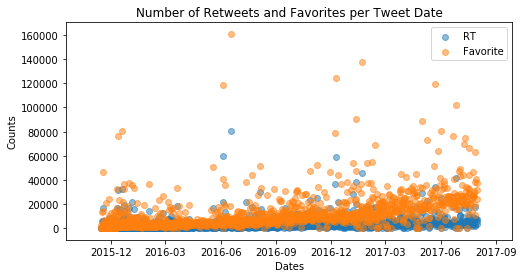

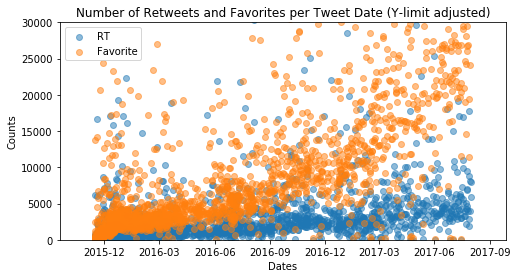

In [59]:
# Plot 
plt.figure(figsize=(8,4))
plt.scatter(df['date'].tolist(), df['rt_count'], alpha=0.5)
plt.scatter(df['date'].tolist(), df['favorite_count'], alpha=0.5)
plt.legend(['RT', 'Favorite'])
plt.xlabel('Dates') 
plt.ylabel('Counts')
plt.title('Number of Retweets and Favorites per Tweet Date')
plt.show()

# Same plot as above but limit y-axis to see the trend without outliers 
plt.figure(figsize=(8,4))
plt.scatter(df['date'].tolist(), df['rt_count'], alpha=0.5)
plt.scatter(df['date'].tolist(), df['favorite_count'], alpha=0.5)
plt.ylim(top=30000,  bottom = 0)
plt.legend(['RT', 'Favorite'])
plt.xlabel('Dates') 
plt.ylabel('Counts')
plt.title('Number of Retweets and Favorites per Tweet Date (Y-limit adjusted)')
plt.show()


### Q2: What is average score per stage? 

In [60]:
df.loc[df['rating_denominator'] != 10] 

# Most of denominators are 10. 
# If denominator is not 10, convert the rating so the new denominator can be 10. 
# Note that one denominator is 0, which will cause error in calculation.
# Therefore we will say max rating is 999 out of 10. 

,tweet_id,rating_numerator,rating_denominator,stage,tweet_image_url,rt_count,favorite_count,date
260,835246439529840640,960,0,None,No image URL,73,2163,2017-02-24
284,832088576586297345,11,15,None,No image URL,2,67,2017-02-16
359,820690176645140481,84,70,None,https://t.co/NIYC820tmd,3390,12705,2017-01-15
425,810984652412424192,24,7,None,"https://t.co/98tB8y7y7t, https://t.co/LouL5vdvxx",1526,5591,2016-12-19
728,758467244762497024,165,150,None,https://t.co/HmwrdfEfUE,2312,4967,2016-07-28
884,740373189193256964,9,11,None,https://t.co/XAVDNDaVgQ,13681,35776,2016-06-08
936,731156023742988288,204,170,None,https://t.co/yGQI3He3xv,1303,3920,2016-05-13
981,722974582966214656,4,20,None,https://t.co/eV1diwds8a,1596,4195,2016-04-21
1018,716439118184652801,50,50,None,https://t.co/Kky1DPG4iq,215,2422,2016-04-03
1044,713900603437621249,99,90,None,https://t.co/mpvaVxKmc1,755,2905,2016-03-27


In [61]:
# Remove 0 from denominator first 
df.loc[df['rating_denominator'] == 0, 'rating_numerator'] = 999
df.loc[df['rating_denominator'] == 0, 'rating_denominator'] = 10


In [62]:
non10_numerator = df.loc[df['rating_denominator'] != 10, 'rating_numerator'] 
non10_denominator = df.loc[df['rating_denominator'] != 10, 'rating_denominator'] 

df.loc[df['rating_denominator'] != 10, 'rating_numerator'] = non10_numerator*(non10_denominator/10)
df.loc[df['rating_denominator'] != 10, 'rating_denominator'] = 10

In [63]:
dogstage, inds = np.unique(df.stage, return_index=True) 
dogstage

array(['None', 'doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo',
       'floofer', 'pupper', 'puppo'], dtype=object)

In [64]:
# Sometimes two stages are on the same row: 
#'doggo, floofer', 'doggo, pupper', 'doggo, puppo'. 
# Make a new df with and separate them into two rows. 
# Rest of column data will be replicated 

df2 = df.loc[df['stage'] == 'doggo, floofer']  
df2 = df2.append(df.loc[df['stage'] == 'doggo, pupper'] )
df2 = df2.append(df.loc[df['stage'] == 'doggo, puppo'] )
df2['stage'] = 'doggo'
df2 = df2.append(df)
df2 = df2.reset_index(drop=True)

In [65]:
df2.loc[df2['stage'] == 'doggo, floofer', 'stage'] = df2.loc[df2['stage'] == 'doggo, floofer', 'stage'].str[len('doggo, '):]
df2.loc[df2['stage'] == 'doggo, pupper', 'stage'] = df2.loc[df2['stage'] == 'doggo, pupper', 'stage'].str[len('doggo, '):]
df2.loc[df2['stage'] == 'doggo, puppo', 'stage'] = df2.loc[df2['stage'] == 'doggo, puppo', 'stage'].str[len('doggo, '):]

dogstage_df2, inds_df2 = np.unique(df2.stage, return_index=True) 
dogstage_df2

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [66]:
#Total average score for all dogs 
# Important: Must use df, not df2 
print('Average score of all dogs is ', np.mean(df['rating_numerator']), '.')


Average score of all dogs is  19.3833487085 .


In [67]:
# Average score per stage. 
# Important : Must use df2 

stagename = 'firstrow'
stageave = 0
stagecount = 0

for stage in dogstage_df2:
#     print('Total number of ', stage, ' is ',
#           len(df.loc[df['stage'] == stage, 'rating_numerator']), '.\n',
#          'Average score of them is',
#          np.mean(df.loc[df['stage'] == stage, 'rating_numerator']), '.')
#     print(stagename)
#     print(stageave)
#     print(stagecount)
    stagename = np.append(stagename, stage)
    stageave = np.append(stageave, np.mean(df2.loc[df2['stage'] == stage, 'rating_numerator']))
    stagecount = np.append(stagecount, len(df2.loc[df2['stage'] == stage, 'rating_numerator']))
    
# Create a table
df_stage = pd.DataFrame.from_records(stagename.reshape(-1,1))
df_stage.rename(columns={0:'stage'}, inplace=True)
df_stage['mean_score'] = pd.DataFrame.from_records(stageave.reshape(-1,1))
df_stage['counts'] = pd.DataFrame.from_records(stagecount.reshape(-1,1))
df_stage = df_stage.drop([0], axis=0)
df_stage = df_stage.reset_index(drop=True)

In [68]:
df_stage

,stage,mean_score,counts
0,None,20.928822,1825
1,doggo,11.755814,86
2,floofer,11.800000,10
3,pupper,10.820513,234
4,puppo,12.080000,25


### Q3. Do images affect to number of retweets and/or favorite counts?

In [73]:
df_image = df.loc[df['tweet_image_url'] != 'No image URL', ['tweet_image_url', 'rt_count', 'favorite_count']]
df_noimage = df.loc[df['tweet_image_url'] == 'No image URL', ['tweet_image_url', 'rt_count', 'favorite_count']]

print('There are ', len(df_image), ' tweets with image(s).')
print('There are ', len(df_noimage), ' tweets without image.')

There are  2110  tweets with image(s).
There are  58  tweets without image.


In [70]:
print('Tweets with images have average of ', np.mean(df_image['rt_count']),
     'retweets, and its standard error is ', np.std(df_image['rt_count']/np.sqrt(len(df_image))),
      '.')
print('Tweets with images have average of ', np.mean(df_image['favorite_count']),
     'favorites, and its standard error is ', np.std(df_image['favorite_count']/np.sqrt(len(df_image))),
      '.')

print('Tweets with no image have average of ', np.mean(df_noimage['rt_count']),
     'retweets, and its standard error is ', np.std(df_noimage['rt_count']/np.sqrt(len(df_noimage))),
      '.')
print('Tweets with no image have average of ', np.mean(df_noimage['favorite_count']),
     'favorites, and its standard error is ', np.std(df_noimage['favorite_count']/np.sqrt(len(df_image))),
      '.')

Tweets with images have average of  2594.67772512 retweets, and its standard error is  99.0447174041 .
Tweets with images have average of  8538.21706161 favorites, and its standard error is  270.301470749 .
Tweets with no image have average of  225.431034483 retweets, and its standard error is  43.5511788542 .
Tweets with no image have average of  1700.32758621 favorites, and its standard error is  41.3911519749 .


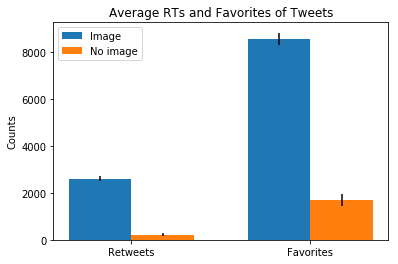

In [78]:
image_means = (np.mean(df_image['rt_count']),np.mean(df_image['favorite_count']))
image_ste = (np.std(df_image['rt_count'])/np.sqrt(len(df_image)),np.std(df_image['favorite_count'])/np.sqrt(len(df_image)))
noimage_means = (np.mean(df_noimage['rt_count']),np.mean(df_noimage['favorite_count']))
noimage_ste = (np.std(df_noimage['rt_count'])/np.sqrt(len(df_noimage)),np.std(df_noimage['favorite_count'])/np.sqrt(len(df_noimage)))

ind = np.arange(len(image_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, image_means, width, yerr=image_ste,
                label='Image')
rects2 = ax.bar(ind + width/2, noimage_means, width, yerr=noimage_ste,
                label='No image')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Average RTs and Favorites of Tweets')
ax.set_xticks(ind)
ax.set_xticklabels(('Retweets', 'Favorites'))
ax.legend()



plt.show()

In [72]:
t_rt, p_rt = stats.ttest_ind(df_image['rt_count'],df_noimage['rt_count'])
print("Retweet: p = " + str(p_rt))

t_fav, p_fav = stats.ttest_ind(df_image['favorite_count'],df_noimage['favorite_count'])
print("Retweet: p = " + str(p_fav))

#p values are very small (p<0.05). This means the difference is significant 

Retweet: p = 7.61338936335e-05
Retweet: p = 2.89022716599e-05


Summary of analysis can be found in `act_report.pdf`.